## Ejercicio 1
Escribir un algoritmo PSO para la maximización de la función:
$$
    y=sin(x)+sin(x^2)
$$
en el intervalo de $0 ≤ x ≤ 10$. Ejecutar el algoritmo en Python con los siguientes parámetros: 

Número de partículas = 2

Máximo número de iteraciones = 30

Coeficientes de aceleración c1 = c2 = 1.49

Peso de inercia w = 0.5


In [65]:
import numpy as np
# from tests.optimizers.test_tolerance import iterations


# función objetivo a maximizar
def f(x):
    return np.sin(x) + np.sin(x**2)  # funcion objetivo: sin(x) + sin(x**2)

# restriccion
def g1(x):
    return 0 <= x <= 10  # restriccion: 0 <= x <= 10

def g2(x):
    return True

# parametros
n_particles = 2  # numero de particulas en el enjambre
max_iterations = 30  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.49  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

# inicialización de particulas
x = np.zeros(n_particles)  # matriz para las posiciones de las particulas
v = np.zeros(n_particles)  # matriz para las velocidades de las particulas
pbest = np.zeros(n_particles)  # matriz para los mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente -infinito)
gbest = 0  # mejor solución global
gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
gbest_fit_history = [] #va guardando el gbest de cada iteracion

# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i])  # calculo la aptitud de la posicion inicial
    if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

# Optimizacion
for J in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
    for i in range(n_particles):
        fit = f(x[i])  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global
        
        # actualizacion de la velocidad de la particula
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()
    gbest_fit_history.append(gbest_fit) 

# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest:.4f}]")
print(f"Valor optimo: {gbest_fit}")

Mejor solucion: [1.2948]
Valor optimo: 1.956572013487849


### c.

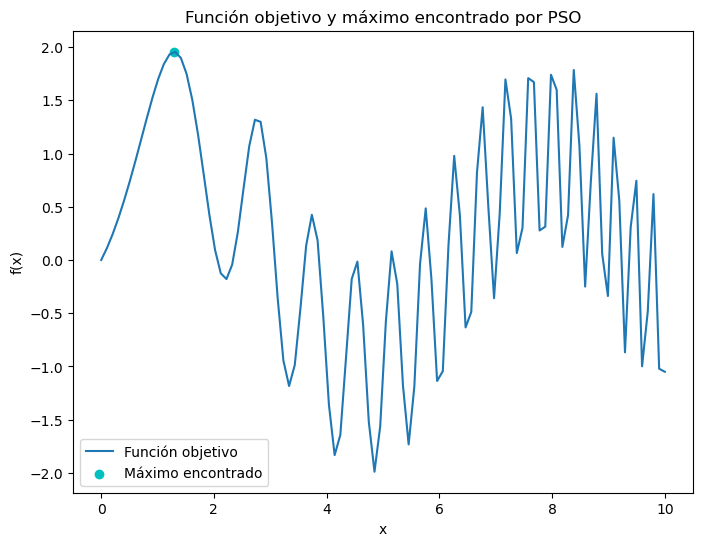

In [66]:
# c.
import matplotlib.pyplot as plt

x_values = np.linspace(0, 10, 100)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función objetivo')
plt.scatter(gbest, gbest_fit, color='c', label='Máximo encontrado')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función objetivo y máximo encontrado por PSO')
plt.legend()

plt.show()

### d.

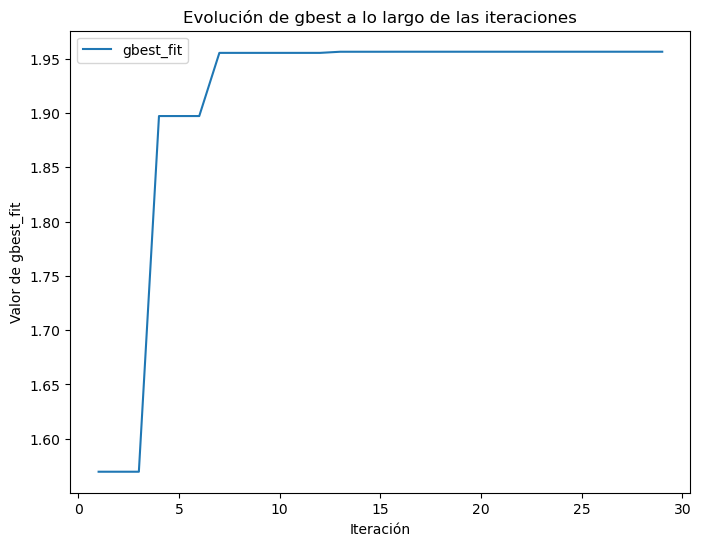

In [67]:
#d.
plt.figure(figsize=(8, 6))
plt.plot(range(max_iterations), gbest_fit_history, label='gbest_fit')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

### e.
Como se puede ver en el grafico del punto c, el maximo encontrado se aproxima al maximo absoluto de la funcion y. Luego, en el punto d, se puede ver como varia en un principio el valor gbest y luego de la iteracion 15 se estabiliza en el valor 1.29 y ya se queda en ese valor, lo que nos podria estar indicando que encontro el maximo.

## Ejercicio 2
Dada la siguiente función perteneciente a un paraboloide elíptico de la forma:
$$
f(x,y)=(x-a)^2+(y+b)^2
$$
donde, las constantes a y b son valores reales ingresados por el usuario a través de la consola, con intervalos de:
$$
-100<=x<=100, x \in \Re
$$
$$
-100<=y<=100, y \in \Re
$$
$$
-50<=a<=50, a \in \Re
$$
$$
-50<=b<=50, b \in \Re
$$

escribir en Python un algoritmo PSO para la minimización de la función (1) con
los siguientes parámetros: número de partículas = 20, máximo número de
iteraciones = 10, coeficientes de aceleración c1 = c2 = 2, peso de inercia w =
0.7, y que cumpla con las siguientes consignas:

Para este ejercicio cuando se corra el algoritmo, se correra 30 veces y se hara un promedio de las salidas, para estandarizar los resultados y asi poder sacar conclusiones estadisticas. Si esto no se hiciera, cada vez que se corra el algoritmo se tendrian cambios muy grandes en los resultados, haciendo imposible sacar conclusiones.

In [68]:
# función objetivo a maximizar
def f(x):
    return (x[0]-20)**2+(x[1]-30)**2  # funcion objetivo: (x-a)^2+(y-b)^2


# primera restriccion
def g1(x):
    return -100 <= x[0] <= 100  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -100 <= x[1] <= 100  # restriccion: -100 <= y <= 100


def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = np.inf  # mejor aptitud global (inicialmente infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit < pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit < pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit < gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_fit_history.append(gbest) 
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    # print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    # print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit, gbest_fit_history

# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.7  # Factor de inercia

all_histories2_1 = []
gbest_final_positions2_1 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits2_1 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_1, gbest_fit2_1, gbest_history2_1 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_1.append(gbest_history2_1)
    gbest_final_positions2_1.append(gbest2_1)  # Guardar la mejor posición final
    gbest_final_fits2_1.append(gbest_fit2_1)  # Guardar la mejor aptitud final
    
gbest_mean2_1 = np.mean(gbest_final_positions2_1, axis=0)
gbest_fit_mean2_1 = np.mean(gbest_final_fits2_1)
gbest_history_mean2_1 = np.mean(all_histories2_1, axis=0)

print("Valor gbest =", gbest_mean2_1)
print("Valor optimo =", gbest_fit_mean2_1)


Valor gbest = [20.32365669 29.79333858]
Valor optimo = 4.180212023876049


### c.

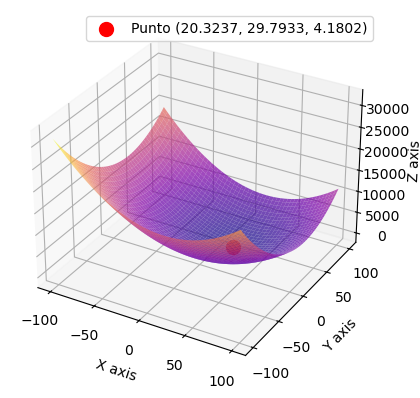

In [69]:
#c. 
# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = (x - 20) ** 2 + (y - 30) ** 2

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
# ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)
# Definir un punto
punto_x, punto_y = gbest_mean2_1
punto_z = gbest_fit_mean2_1
# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='red', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

### d.

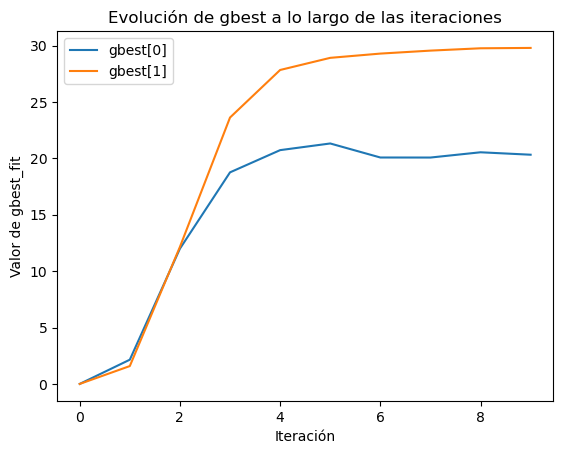

In [70]:
#d.
plt.plot(range(max_iterations), gbest_history_mean2_1[:,0], label='gbest[0]')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,1], label='gbest[1]')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()


### e.

In [71]:
#e
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia

all_histories2_2 = []
gbest_final_positions2_2 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits2_2 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_2, gbest_fit2_2, gbest_history2_2 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_2.append(gbest_history2_2)
    gbest_final_positions2_2.append(gbest2_2)  # Guardar la mejor posición final
    gbest_final_fits2_2.append(gbest_fit2_2)  # Guardar la mejor aptitud final
    
gbest_mean2_2 = np.mean(gbest_final_positions2_2, axis=0)
gbest_fit_mean2_2 = np.mean(gbest_final_fits2_2)
gbest_history_mean2_2 = np.mean(all_histories2_2, axis=0)

print("Valor gbest =", gbest_mean2_1)
print("Valor optimo =", gbest_fit_mean2_1)

Valor gbest = [20.32365669 29.79333858]
Valor optimo = 4.180212023876049


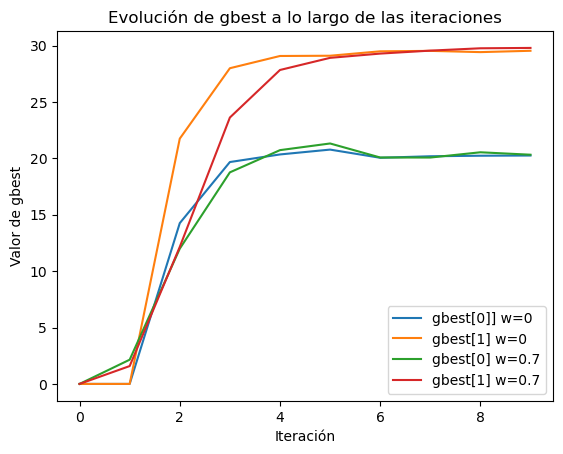

In [72]:
plt.plot(range(max_iterations), gbest_history_mean2_2[:,0], label='gbest[0]] w=0')
plt.plot(range(max_iterations), gbest_history_mean2_2[:,1], label='gbest[1] w=0')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,0], label='gbest[0] w=0.7')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,1], label='gbest[1] w=0.7')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

Como se puede ver el el grafico, con $\omega = 0$ se aproximan al valor final con una pendiente mayor que con $\omega =0.7$. En parametros generales, pareceria ser que con $\omega =0.7$ el algoritmo se estaria estabilizando mas rapido y estaria funcionando mejor.

### f.

In [73]:
#f.
from pyswarm import pso

# Función modificada para registrar el mejor valor global en cada iteración
a = 20  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola
b = 30  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola

# función objetivo
def funcion_objetivo(x):
    return (x[0]-a)**2+(x[1]-b)**2

lb = [-100, -100]  # limite inf
ub = [100, 100]  # limite sup

# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
historial_gbest = []

solucion_optima_all = []  # Para guardar el gbest de cada ejecución
valor_optimo_all = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_2, gbest_fit2_2, gbest_history2_2 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_2.append(gbest_history2_2)
    gbest_final_positions2_2.append(gbest2_2)  # Guardar la mejor posición final
    gbest_final_fits2_2.append(gbest_fit2_2)  # Guardar la mejor aptitud final
    
gbest_mean2_2 = np.mean(gbest_final_positions2_2, axis=0)
gbest_fit_mean2_2 = np.mean(gbest_final_fits2_2)
gbest_history_mean2_2 = np.mean(all_histories2_2, axis=0)
for i in range(times2run):
    solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=0.7)
    solucion_optima_all.append(solucion_optima)
    valor_optimo_all.append(valor_optimo)
solucion_optima_mean = np.mean(solucion_optima_all, axis=0)
valor_optimo_mean = np.mean(valor_optimo_all, axis=0)
# Resultados
print("\nSolución óptima (x, y):", solucion_optima_mean)
print("Valor óptimo:", valor_optimo_mean)

No constraints given.
Best after iteration 1: [-0.35989554 42.95555724] 582.3718099586299
Best after iteration 2: [-0.35989554 42.95555724] 582.3718099586299
New best for swarm at iteration 3: [29.84320703  8.83394852] 544.8904599048839
Best after iteration 3: [29.84320703  8.83394852] 544.8904599048839
Best after iteration 4: [29.84320703  8.83394852] 544.8904599048839
New best for swarm at iteration 5: [15.62554824 29.66782391] 19.246169171956527
Best after iteration 5: [15.62554824 29.66782391] 19.246169171956527
Best after iteration 6: [15.62554824 29.66782391] 19.246169171956527
Best after iteration 7: [15.62554824 29.66782391] 19.246169171956527
Best after iteration 8: [15.62554824 29.66782391] 19.246169171956527
New best for swarm at iteration 9: [18.34377954 34.02542543] 18.94711609211118
Best after iteration 9: [18.34377954 34.02542543] 18.94711609211118
New best for swarm at iteration 10: [22.93948766 32.73204189] 16.104640577200513
Best after iteration 10: [22.93948766 32.73

### g.

Pareceria estar comportandose mejor el algoritmo sin Pyswarm, ya que encuentra un minimo menor en promedio, al que encuentra con pyswarm.

## Ejercicio 3

Maximizar mediante PSO en Python y con parámetros a elección la función:
$$
z=e^{-0.1\cdot (x^2+y^2)}\cdot cos(x)\cdot sin(x)
$$
donde el intervalo de las variables de decisión se encuentra en el rango 
$$
-50 <= (x, y) <= 50. 
$$

Para este ejercicio cuando se corra el algoritmo, se correra 30 veces y se hara un promedio de las salidas, para estandarizar los resultados y asi poder sacar conclusiones estadisticas. Si esto no se hiciera, cada vez que se corra el algoritmo se tendrian cambios muy grandes en los resultados, haciendo imposible sacar conclusiones.

In [74]:
# función objetivo a maximizar
def f(x):
    return np.exp(-0.1*(x[0]**2+x[1]**2))*np.cos(x[0])*np.sin(x[0])


# primera restriccion


def g1(x):
    return -50 <= x[0] <= 50  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -50 <= x[1] <= 50  # restriccion: -100 <= y <= 100

def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente-infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_history = []
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_history.append(gbest) 
        gbest_fit_history.append(gbest_fit)
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    # print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    # print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit,gbest_history, gbest_fit_history

# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.8  # Factor de inercia

gbest_histories3_1 = []
gbest_fit_histories3_1 = []
gbest_final_positions3_1 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_1 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest, gbest_fit, gbest_history, gbest_fit_history = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    gbest_histories3_1.append(gbest_history)
    gbest_fit_histories3_1.append(gbest_fit_history)
    gbest_final_positions3_1.append(gbest)  # Guardar la mejor posición final
    gbest_final_fits3_1.append(gbest_fit)  # Guardar la mejor aptitud final
    
gbest_mean3_1 = np.mean(gbest_final_positions3_1, axis=0)
gbest_fit_mean3_1 = np.mean(gbest_final_fits3_1)
gbest_history_mean3_1 = np.mean(gbest_histories3_1, axis=0)
gbest_fit_history_mean3_1 = np.mean(gbest_fit_histories3_1, axis=0)

print(f"Mejor solucion: [{gbest_mean3_1[0]:.4f}, {gbest_mean3_1[1]:.4f}]")
print(f"Valor optimo: {gbest_fit_mean3_1}")

Mejor solucion: [0.7246, 0.1617]
Valor optimo: 0.4572412324517422


### c.

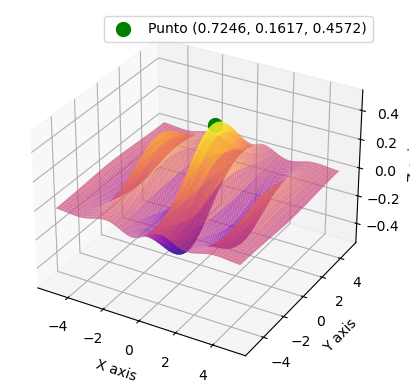

In [75]:
#c. 
import numpy as np
import matplotlib.pyplot as plt



# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = np.exp(-0.1*(x**2+y**2))*np.cos(x)*np.sin(x)

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
# ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)
# Definir un punto
punto_x, punto_y = gbest_mean3_1
punto_z = gbest_fit_mean3_1
# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='green', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

### d.

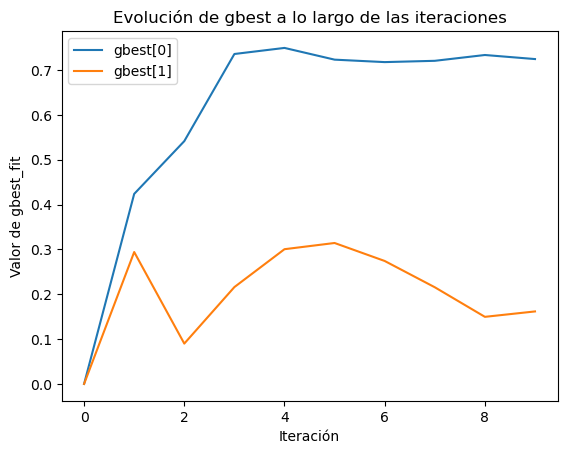

In [76]:
# #d.

plt.plot(range(max_iterations), gbest_history_mean3_1[:,0], label='gbest[0]')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,1], label='gbest[1]')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()


### e.

In [77]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia

gbest_histories3_2 = []
gbest_fit_histories3_2 = []
gbest_final_positions3_2 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_2 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest, gbest_fit, gbest_history, gbest_fit_history = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    gbest_histories3_2.append(gbest_history)
    gbest_fit_histories3_2.append(gbest_fit_history)
    gbest_final_positions3_2.append(gbest)  # Guardar la mejor posición final
    gbest_final_fits3_2.append(gbest_fit)  # Guardar la mejor aptitud final
    
gbest_mean3_2 = np.mean(gbest_final_positions3_2, axis=0)
gbest_fit_mean3_2 = np.mean(gbest_final_fits3_2)
gbest_history_mean3_2 = np.mean(gbest_histories3_2, axis=0)
gbest_fit_history_mean3_2 = np.mean(gbest_fit_histories3_2, axis=0)

print(f"Mejor solucion: [{gbest_mean3_2[0]:.4f}, {gbest_mean3_2[1]:.4f}]")
print(f"Valor optimo: {gbest_fit_mean3_2}")

Mejor solucion: [0.7490, 0.2020]
Valor optimo: 0.46373157892069433


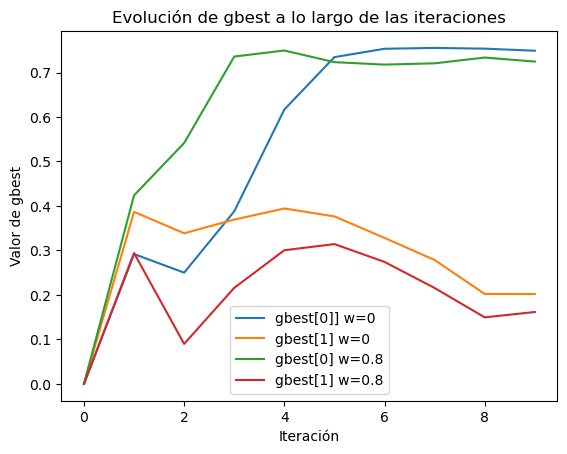

In [78]:
plt.plot(range(max_iterations), gbest_history_mean3_2[:,0], label='gbest[0]] w=0')
plt.plot(range(max_iterations), gbest_history_mean3_2[:,1], label='gbest[1] w=0')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,0], label='gbest[0] w=0.8')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,1], label='gbest[1] w=0.8')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

### f

In [79]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.5# Factor de inercia

gbest_histories3_3 = []
gbest_fit_histories3_3 = []
gbest_final_positions3_3 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_3 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest, gbest_fit, gbest_history, gbest_fit_history = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    gbest_histories3_3.append(gbest_history)
    gbest_fit_histories3_3.append(gbest_fit_history)
    gbest_final_positions3_3.append(gbest)  # Guardar la mejor posición final
    gbest_final_fits3_3.append(gbest_fit)  # Guardar la mejor aptitud final
    
gbest_mean3_3 = np.mean(gbest_final_positions3_3, axis=0)
gbest_fit_mean3_3 = np.mean(gbest_final_fits3_3)
gbest_history_mean3_3 = np.mean(gbest_histories3_3, axis=0)
gbest_fit_history_mean3_3 = np.mean(gbest_fit_histories3_3, axis=0)

print(f"Mejor solucion: [{gbest_mean3_3[0]:.4f}, {gbest_mean3_3[1]:.4f}]")
print(f"Valor optimo: {gbest_fit_mean3_3}")

Mejor solucion: [0.7581, 0.0584]
Valor optimo: 0.4682308410200821


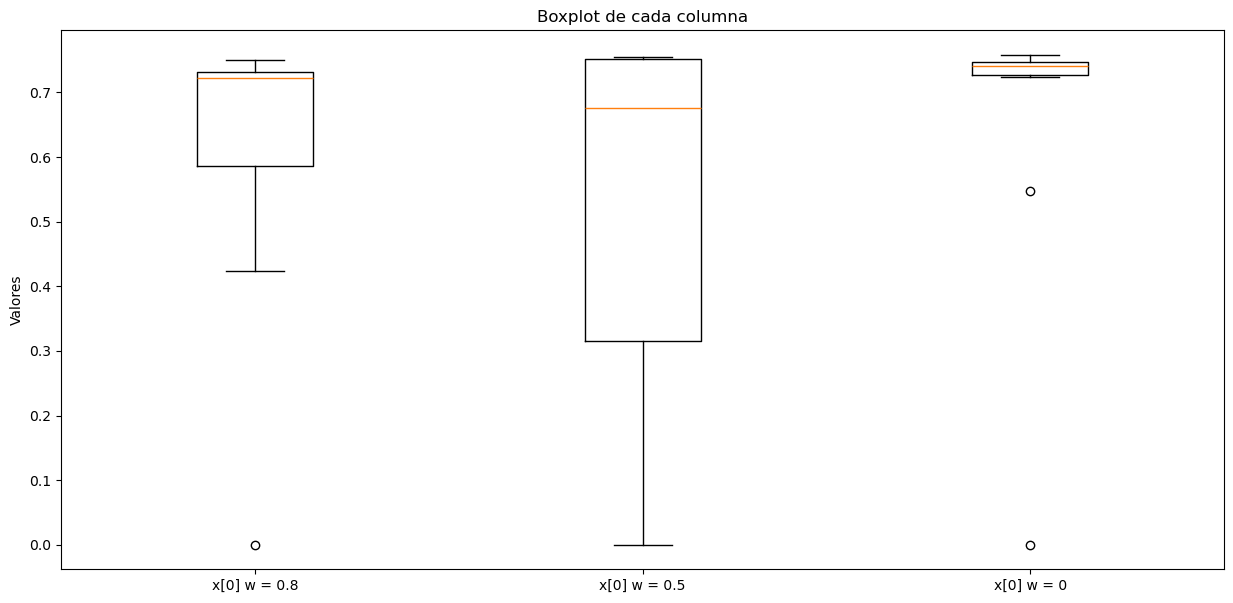

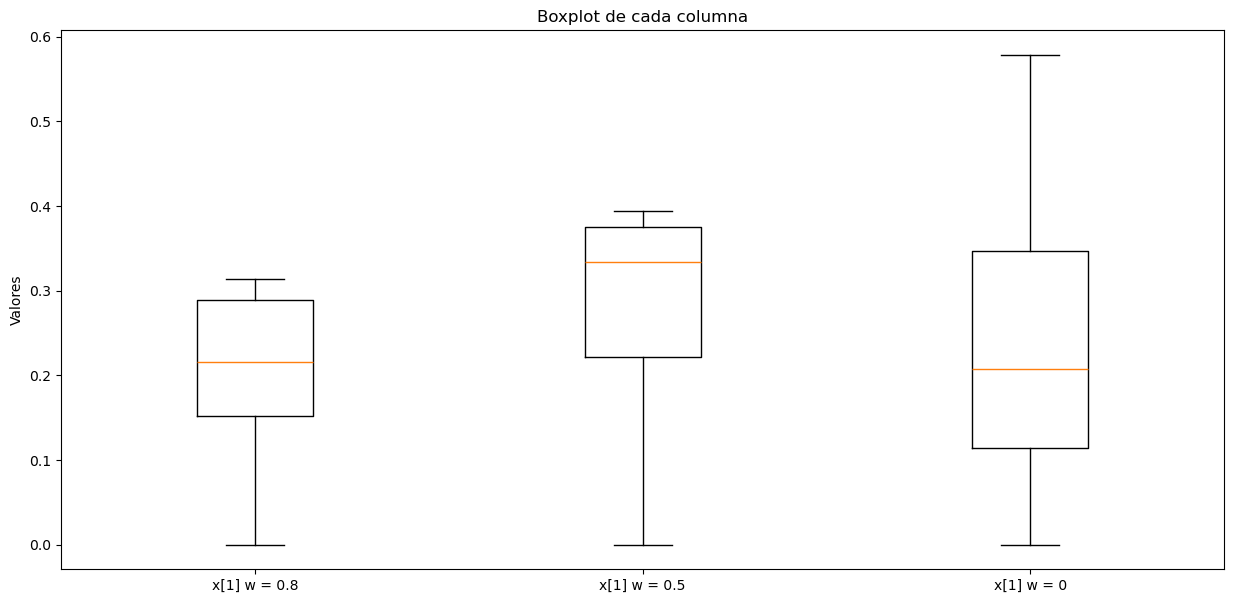

In [80]:

fig = plt.figure(figsize =(15, 7))
plt.boxplot([gbest_history_mean3_1[:,0], gbest_history_mean3_2[:,0], gbest_history_mean3_3[:,0]], labels=["x[0] w = 0.8", "x[0] w = 0.5", "x[0] w = 0"])
plt.title("Boxplot de cada columna")
plt.ylabel("Valores")

plt.show()
fig2 = plt.figure(figsize =(15, 7))
plt.boxplot([gbest_history_mean3_1[:,1], gbest_history_mean3_2[:,1], gbest_history_mean3_3[:,1]], labels=["x[1] w = 0.8", "x[1] w = 0.5", "x[1] w = 0"])
plt.title("Boxplot de cada columna")
plt.ylabel("Valores")

plt.show()

Text(0, 0.5, 'Valores')

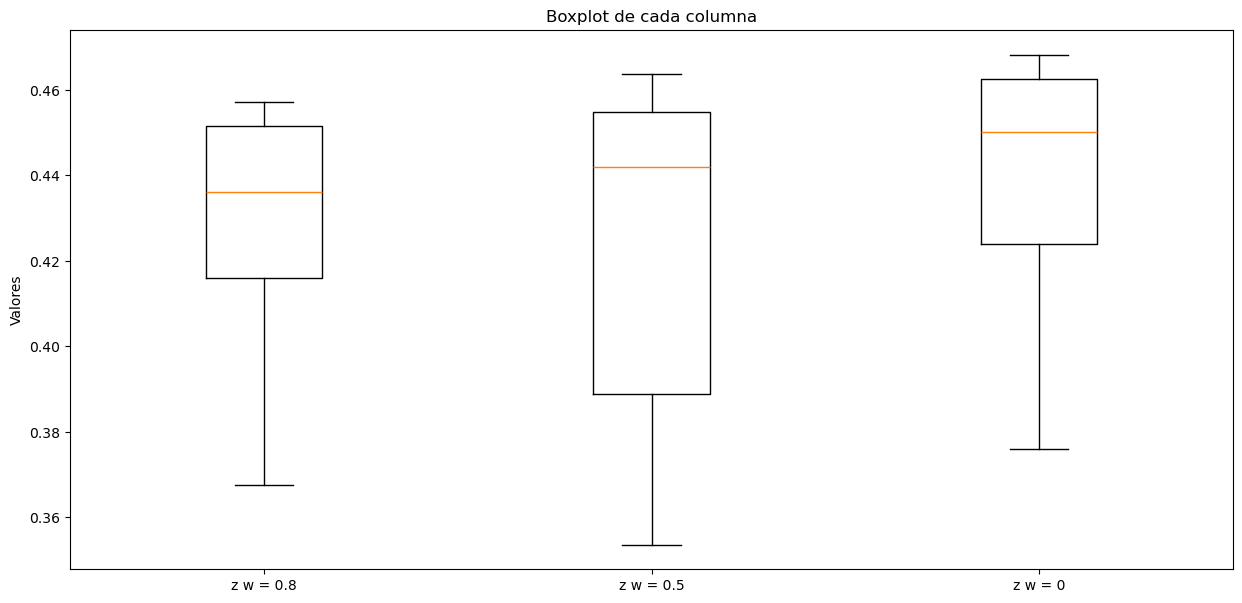

In [81]:
fig = plt.figure(figsize =(15, 7))
plt.boxplot([gbest_fit_history_mean3_1, gbest_fit_history_mean3_2, gbest_fit_history_mean3_3], labels=["z w = 0.8", "z w = 0.5", "z w = 0"])
plt.title("Boxplot de cada columna")
plt.ylabel("Valores")

### g.

* Medianas y tendencia central:

El valor central es bastante similar en los tres boxplots, lo que indica que el valor típico de los resultados de la optimización no varía de manera significativa al modificar la inercia de las partículas.

* Distribución de los resultados:

El boxplot correspondiente a zw = 0.5 muestra la mayor dispersión en sus resultados. Esto se puede ver en la gran distancia entre el primer y tercer cuartil, lo que implica una mayor variabilidad en los resultados obtenidos con esta inercia.
En cambio, los boxplots correspondientes a zw = 0.8 y zw = 0 presentan una menor dispersión, lo que sugiere que los resultados son más consistentes en estos casos.

* Impacto de la inercia en los resultados:

A medida que la inercia disminuye (de zw = 0.8 a zw = 0), parece haber una tendencia hacia una mayor dispersión, especialmente en zw = 0.5, donde el rango es el más amplio.
Esto podría sugerir que una inercia media genera resultados menos consistentes en comparación con los valores extremos de inercia.

En resumen, parece que los valores extremos de inercia (zw = 0.8 y zw = 0) producen resultados más estables y con menos variabilidad, mientras que una inercia intermedia (zw = 0.5) genera mayor dispersión en los resultados de la optimización.

## Ejercicio 4

Para este ejercicio cuando se corra el algoritmo, se correra 30 veces y se hara un promedio de las salidas, para estandarizar los resultados y asi poder sacar conclusiones estadisticas. Si esto no se hiciera, cada vez que se corra el algoritmo se tendrian cambios muy grandes en los resultados, haciendo imposible sacar conclusiones.

Resolver con PSO el siguiente sistema de ecuaciones:

 $$
\begin{cases}
3x + 2y = 9 \\
x - 5y = 4
\end{cases}
$$

Hay que construir una función de aptitud que mida qué tan cerca están las partículas de satisfacer ambas ecuaciones. 

Esta funcion aptitud sera la sima de los cuadrados de cada ecuacion:

$$
aptitud(x,y)=(3x + 2y - 9)^2 + (x - 5y - 4)^2
$$

Luego se minimiza esa funcion utilizando el algoritmo PSO
### a.

Primero se hara un grafico de ambas funciones para ver aproximadamente donde se cruzan para saber que restricciones ponerle al algoritmo

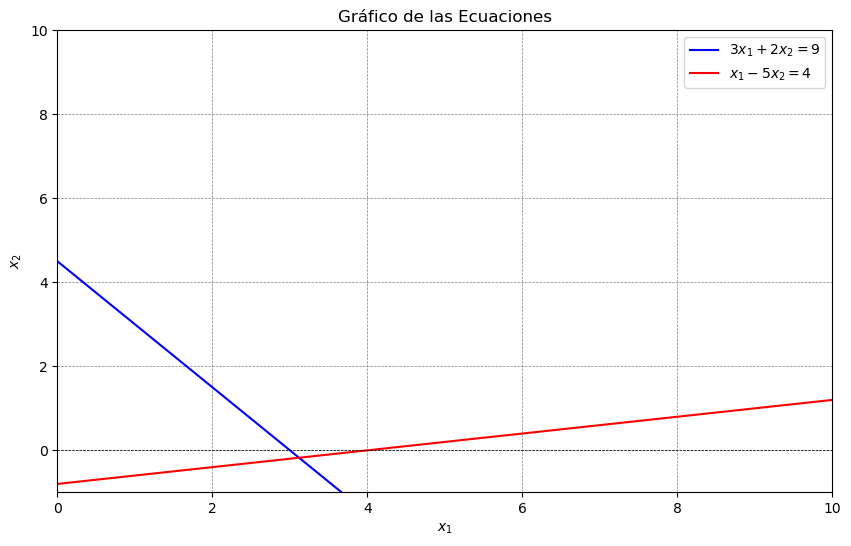

In [82]:
# Definir las ecuaciones
def f1(x1):
    return (9 - 3 * x1) / 2

def f2(x1):
    return (x1 - 4) / 5

# Crear un rango de valores para x1
x1_values = np.linspace(0, 10, 200)
x2_values_eq1 = f1(x1_values)
x2_values_eq2 = f2(x1_values)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x1_values, x2_values_eq1, label=r'$3x_1 + 2x_2 = 9$', color='blue')
plt.plot(x1_values, x2_values_eq2, label=r'$x_1 - 5x_2 = 4$', color='red')
plt.xlim(0, 10)
plt.ylim(-1, 10)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Gráfico de las Ecuaciones')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

Como se puede ver, las rectas se cortan entre 2 y 4 en x1 y entre 0 y -2 en x2 por lo tanto ahi se pondran las restricciones

In [83]:
def funcion_objetivo(x):
    # sistema de ecuaciones
    f1 = 3*x[0]+2*x[1]-9
    f2 = x[0] - 5*x[1] -4
    
    # devuelvo la funcion aptitud que es la suma de los errores cuadrados de cada ecuacion
    return f1**2 + f2**2


In [84]:
from pyswarm import pso

lb = [2, -2]  # limite inf
ub = [4, 0]  # limite sup

# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 15  # numero máximo de iteraciones para la optimizacion\
c1 = c2 = 1
w = 0.5
historial_gbest = []

# Llamada a la función pso
solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=w, phig=c1, phip=c2)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
New best for swarm at iteration 1: [ 3.00768157 -0.10531152] 0.25211878112969716
Best after iteration 1: [ 3.00768157 -0.10531152] 0.25211878112969716
New best for swarm at iteration 2: [ 3.05864575 -0.1385177 ] 0.0721052342627062
Best after iteration 2: [ 3.05864575 -0.1385177 ] 0.0721052342627062
Best after iteration 3: [ 3.05864575 -0.1385177 ] 0.0721052342627062
Best after iteration 4: [ 3.05864575 -0.1385177 ] 0.0721052342627062
New best for swarm at iteration 5: [ 3.12136487 -0.1624208 ] 0.00596719303945708
Best after iteration 5: [ 3.12136487 -0.1624208 ] 0.00596719303945708
Best after iteration 6: [ 3.12136487 -0.1624208 ] 0.00596719303945708
New best for swarm at iteration 7: [ 3.13604778 -0.17050362] 0.0046379957428528745
New best for swarm at iteration 7: [ 3.1298135  -0.17320844] 0.0018682063889563117
Best after iteration 7: [ 3.1298135  -0.17320844] 0.0018682063889563117
Best after iteration 8: [ 3.1298135  -0.17320844] 0.0018682063889563117
New best 

#### d.
Arriba se explica como se obtuvieron las restricciones

* Para resolver un sistema de n ecuaciones no lineales, definimos el sistema de ecuaciones:
$$
f_1(x_1,x_2,...,x_n)=0
$$
$$
f_2(x_1,x_2,...,x_n)=0
$$
$$
\vdots
$$
$$
f_n(x_1,x_2,...,x_n)=0
$$
$f_i$  representa una ecuación no lineal del sistema.

Definimos una función objetivo que sea mínima cuando todas las ecuaciones del sistema sean iguales a 0. Esto lo hacemos minimizando la suma de los cuadrados de cada ecuación:
$$
g(x_1,x_2,...,x_n)=\sum_{i=1}^{n}f_i(x_1,x_2,...,x_n)^2
$$

Inicializamos una población de partículas, donde cada partícula representa una posible solución $x=(x_1,x_2...x_n)$

Actualizamos las posiciones y velocidades de las partículas usando las reglas de PSO hasta que la función objetivo $g(x)$ se acerque a cero o hasta alcanzar un número máximo de iteraciones.

Si el algoritmo PSO converge a un mínimo donde $g(x)≈0$, entonces podemos afirmar que hemos encontrado una solución aproximada al sistema de ecuaciones no lineales.

* El resultado obtenido depende de los parametros elegidos, para mostrar esto se va a correr nuevamente el algoritmo pero con parametros signoficativamente diferentes, dejando igual el numero de iteraciones, para poder ver la diferencia.

In [85]:
lb = [-50, -50]  # limite inf
ub = [50, 50]  # limite sup

# parametros
n_particles = 5  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 15  # numero máximo de iteraciones para la optimizacion\
c1 = c2 = 100
w = 0.1

# Llamada a la función pso
solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=w, phig=c1, phip=c2)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
Best after iteration 1: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 2: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 3: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 4: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 5: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 6: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 7: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 8: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 9: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 10: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 11: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 12: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 13: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 14: [ 4.81175054 -5.8828301 ] 953.6791654257496
Best after iteration 

Como se puede ver, da un valor muy diferente al anterior y el algoritmo no estaria funcionando bien de esta forma. Es por eso que es muy importante la seleccion de los parametros, asi se puede obtener el mejor resultado en la menor cantidad de iteraciones posibles.